<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 9.2: CNN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- A guide you are encouraged to read through is TensorFlow's own tutorial for image classification, which can be found [here](https://www.tensorflow.org/tutorials/images/cnn)

## CIFAR10 small image classification
- [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset of color training images, labeled over 10 categories.

It has the classes:
- airplane
- automobile
- bird
- cat
- deer
- dog
- frog
- horse
- ship
- truck

## Import libraries

In [1]:
!pip install tensorflow

In [1]:
# !conda install -c conda-forge tensorflow

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Uncomment the statements below if there are problems with TensorFlow on macOS
# import os
# os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [4]:
# insert code here

In [5]:
# Uncomment the statement below to allow online monitoring with TensorBoard (need to be installed)
from keras.callbacks import TensorBoard

## Load data
Use the **Keras**' load method.

In [6]:
# Load the CIFAR10 dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()



170498071/170498071 [==============================] - 68s 0us/step


## Check some data

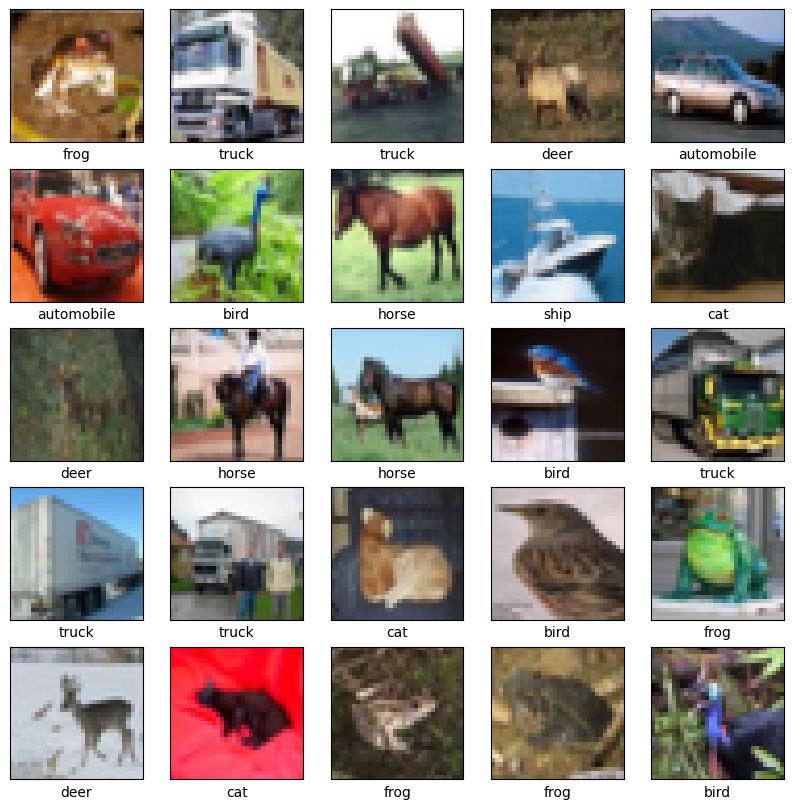

In [7]:
# Check some sample images
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plot sample images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

## Prepare data

In [8]:
# Normalize the pixel values (0-255) to the range of 0 to 1
X_train, X_test = X_train / 255.0, X_test / 255.0

## Create the model's architecture
- **NOTE ALERT**: Take into account the volume of data and parameters. Time and processing escalate quite fast.
- **NOTE ALERT**: It is likely this data will require more complex models.

In [9]:
# Create the CNN model
model = models.Sequential()

# Add data augmentation (optional)
# model.add(data_augmentation)

# First Convolutional Layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Second Convolutional Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third Convolutional Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the results to feed into a Dense Layer
model.add(layers.Flatten())

# Fully Connected Layer
model.add(layers.Dense(64, activation='relu'))

# Output Layer with 10 classes
model.add(layers.Dense(10, activation='softmax'))

# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

## Compile the model

In [10]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Fit the training data

In [14]:
# Uncomment the statement below to allow online monitoring with TensorBoard
tensorboard = TensorBoard(log_dir = 'logs') 


In [15]:
import time

start_time = time.time()

# Your model training or other code here
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

Epoch 1/10


2024-10-03 17:43:06.248183: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1563/1563 [==============================] - 12s 8ms/step - loss: 1.5317 - accuracy: 0.4410 - val_loss: 1.2680 - val_accuracy: 0.5400
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1901 - accuracy: 0.5785 - val_loss: 1.1607 - val_accuracy: 0.5907
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0385 - accuracy: 0.6347 - val_loss: 1.0270 - val_accuracy: 0.6392
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9470 - accuracy: 0.6683 - val_loss: 0.9632 - val_accuracy: 0.6663
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8725 - accuracy: 0.6959 - val_loss: 0.9124 - val_accuracy: 0.6801
Epoch 6/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.8238 - accuracy: 0.7133 - val_loss: 0.9091 - val_accuracy: 0.6860
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7766 - accuracy: 0.7263 - val_loss: 0.9008 - val_accuracy: 0.6

In [16]:
# Directory where logs will be saved
log_dir = "logs/fit/" + time.strftime("%Y-%m-%d_%H-%M-%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)


In [20]:
# Train the model
%%time
# Train the model with TensorBoard logging
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[tensorboard_callback])

UsageError: Line magic function `%%time` not found.


### TensorBoard
- TensorBoard is TensorFlow's visualisation toolkit.
- If Tensorflow 2 and Jupyter is installed in the same environment, running the cell below will start TensorBoard within the notebook.
- More information about how to set up TensorBoard can be found [here](https://www.tensorflow.org/tensorboard/tensorboard_in_notebooks)


In [21]:
%load_ext tensorboard
%tensorboard --logdir logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 75503), started 0:10:26 ago. (Use '!kill 75503' to kill it.)

## Create predictions

In [30]:
%%time
predictions = model.predict(X_test)
# Use np.argmax to get the class with the highest probability for each sample
predicted_classes = np.argmax(predictions, axis=1)

313/313 [==============================] - 1s 3ms/step
CPU times: user 3.41 s, sys: 562 ms, total: 3.97 s
Wall time: 933 ms


## Evaluate the model

In [31]:
# Evaluate the model performance
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

313/313 - 1s - loss: 0.8902 - accuracy: 0.7061 - 780ms/epoch - 2ms/step
Test accuracy: 0.7060999870300293


## Visualisation of cost

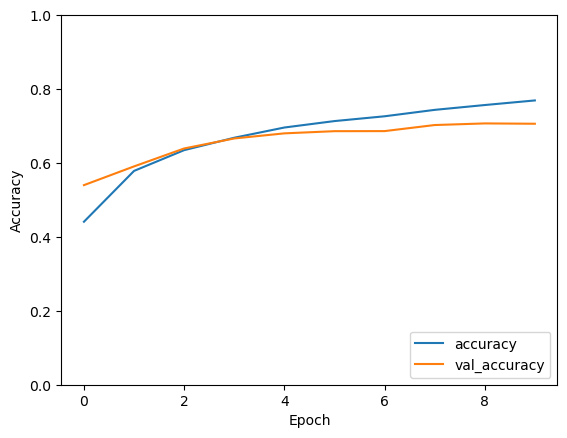

In [32]:
# Plot training & validation accuracy and loss
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

## Results

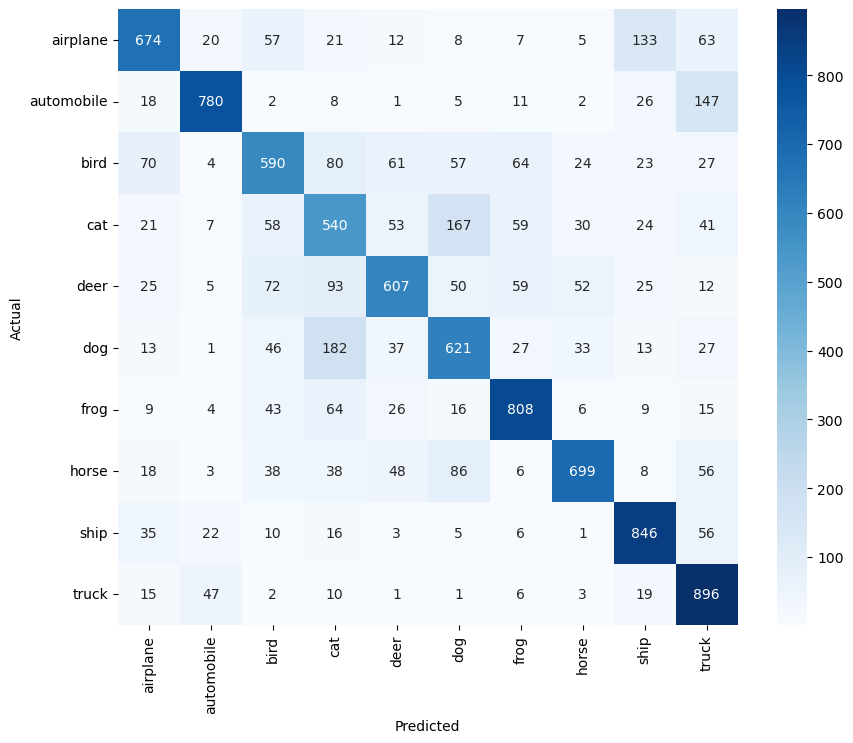

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Ensure predictions are class labels
predicted_classes = np.argmax(predictions, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



